In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import mean
from math import gamma, sqrt
%matplotlib inline

# Распределение Вейбулла

Распределе́ние Ве́йбулла в теории вероятностей — двухпараметрическое семейство абсолютно непрерывных распределений. Названо в честь Валодди Вейбулла, детально охарактеризовавшего его в 1951, хотя впервые его определил Фреше в 1927, а применено оно было ещё в 1933 для описания распределения размеров частиц.
[Википедия](https://www.wikiwand.com/ru/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%92%D0%B5%D0%B9%D0%B1%D1%83%D0%BB%D0%BB%D0%B0 "Распределение Вейбулла")

#### Отрывок из статьи на Хабре: [Типичные распределения вероятности: шпаргалка data scientist-а](https://habr.com/ru/post/331060/)

Снова о звонках в техподдержку: сколько пройдёт до следующего звонка? Распределение этого времени ожидания как будто бы геометрическое, потому что каждая секунда, пока никто не звонит – это как неуспех, до секунды, пока, наконец, звонок не произойдёт. Количество неудач –это как количество секунд, пока никто не звонил, и это практически время до следующего звонка, но «практически» нам недостаточно. Суть в том, что это время будет суммой целых секунд, и, таким образом, не получится посчитать ожидание внутри этой секунды до непосредственно звонка.

Ну и, как и раньше, переходим в геометрическом распределении к пределу, относительно временных долей – и вуаля. Получаем экспоненциальное распределение, которое точно описывает время до звонка. Это непрерывное распределение, первое такое у нас, потому что исход не обязательно в целых секундах. Как и распределение Пуассона, оно параметризуется интенсивностью λ.
...
Экспоненциальное распределение должно приходить на ум при размышлении о «времени до события», возможно, «времени до отказа». По факту, это такая важная ситуация, что существуют более обобщённые распределения чтобы описать наработку-на-отказ, типа распределения Вейбула. В то время, как экспоненциальное распределение подходит, когда интенсивность — износа, или отказов, например – постоянна, распределение Вейбула может моделировать увеличивающуюся (или уменьшающуюся) со временем интенсивность отказов. Экспоненциальное, в общем-то, частный случай.

Думайте «Вейбул» когда разговор заходит о наработке-на-отказ.

Cоздаём распределение для параметров $\lambda=1$ и $k=0.5$ и генерируем выборку размера 1000:

In [11]:
k = 0.75
lambda_ = 1.0

weibull_rv = sts.weibull_min(c=k, scale=lambda_) # lambda=1 установлен по умолчанию

sample = weibull_rv.rvs(1000)

Рисуем гистограмму выборки и теоретический график плотности вероятности (PDF):

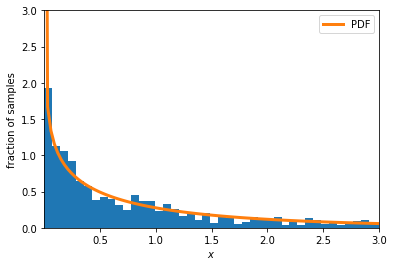

In [12]:
x = np.linspace(0.00001,3,100)

plt.hist(sample, density=True, bins=250)
pdf = weibull_rv.pdf(x)
plt.plot(x, pdf, label='PDF',linewidth=3.0)
plt.legend()
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.xlim(0.00001,3)
plt.ylim(0,3);

Для выборочного среднего генерируем по 1000 выборок объёмов 5, 10 и 50:

In [4]:
sample = {}
for n in [5,10,50]:
    sample[n] = [mean(weibull_rv.rvs(n)) for i in range(1000)]

Считаем математическое ожидание и дисперсию исходного распределения (по формулам из Википедии). Сразу считаем дисперсии для различных объёмов наших выборок (матожидание не меняется):

In [5]:
weibull_EX = lambda_ * gamma(1+1/k)
weibull_DX = lambda_**2 * gamma(1+2/k) - weibull_EX**2
print("Матожидание = %f, дисперсия = %f" % (weibull_EX, weibull_DX))
for n in [5,10,50]:
    print("Дисперсия для выборки объёма %2d = %f" % (n, weibull_DX/n))

Матожидание = 1.190639, дисперсия = 2.594579
Дисперсия для выборки объёма  5 = 0.518916
Дисперсия для выборки объёма 10 = 0.259458
Дисперсия для выборки объёма 50 = 0.051892


Гистограмма и PDF для выборки объёма 5:

(0, 3)

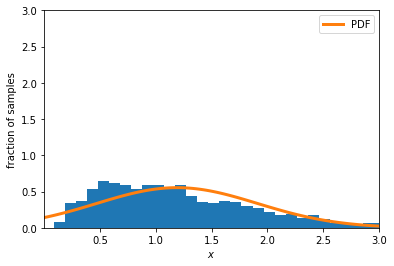

In [6]:
n = 5
x = np.linspace(0.00001,3,100)

plt.hist(sample[n], density=True, bins=50)
pdf = sts.norm(loc=weibull_EX, scale=sqrt(weibull_DX/n)).pdf(x)
plt.plot(x, pdf, label='PDF',linewidth=3.0)
plt.legend()
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.xlim(0.00001,3)
plt.ylim(0,3)

Гистограмма и PDF для выборки объёма 10:

(0, 3)

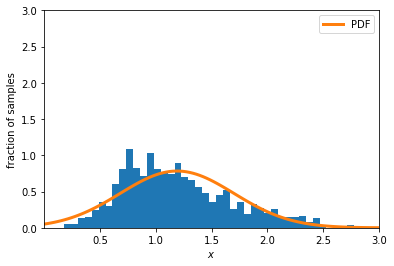

In [7]:
n = 10
x = np.linspace(0.00001,3,100)

plt.hist(sample[n], density=True, bins=50)
pdf = sts.norm(loc=weibull_EX, scale=sqrt(weibull_DX/n)).pdf(x)
plt.plot(x, pdf, label='PDF',linewidth=3.0)
plt.legend()
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.xlim(0.00001,3)
plt.ylim(0,3)

Гистограмма и PDF для выборки объёма 50:

(0, 3)

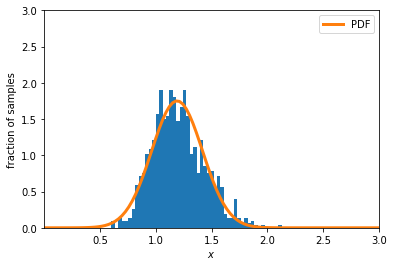

In [8]:
n = 50
x = np.linspace(0.00001,3,100)

plt.hist(sample[n], density=True, bins=50)
pdf = sts.norm(loc=weibull_EX, scale=sqrt(weibull_DX/n)).pdf(x)
plt.plot(x, pdf, label='PDF',linewidth=3.0)
plt.legend()
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.xlim(0.00001,3)
plt.ylim(0,3)

### Вывод
Центральная предельная теорема работает: мы видим, что с увеличением <i>n</i> наше распределение средних всё лучше отображается нормальным. Также, если для двух первых значений 5 и 10 скошенность влево ещё присутствует, то на 50 она уже практически не видна. Графики и функции, и гистограммы продолжают вытягиваться вверх, так как наши значения всё реже отходят далеко от матожидания исходного распределения.